# Clasificación de Imágenes utilizando Redes Neuronales Convolucionales

## Alumno: Patrick Xavier Marquez Choque

Curso: Tópicos en Inteligencia Artificial

Profesor: Jose Eduardo Ochoa Luna




In [1]:
# Clasificación de imágenes uitilizando redes neuronales convolucionales.
# Librerías Necesarias
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import math

In [2]:
# Recibir los pixeles y extraer las características y clasificar con capas regulares
# Cargar los datos de MNIST
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

## Entrenamiento utilizando los datos de MNIST 

MNIST cuenta con imágenes de 28x28 píxeles en blanco y negro de números siendo  70 000 imágenes pre-etiquetadas para la clasificación

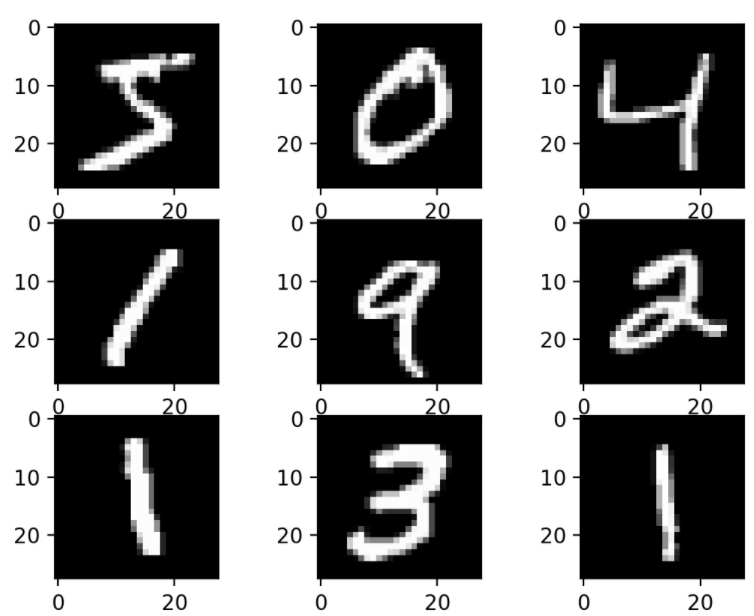


In [3]:
# Parámetros de los Datos
PIXEL_SIZE = 255
filas = 2
columnas = 8
MATRIX_SIZE = filas * columnas
BATCH_SIZE = 32
NUM_EPOCHS = 24
TRAIN_SIZE = 60000
TEST_SIZE = 10000

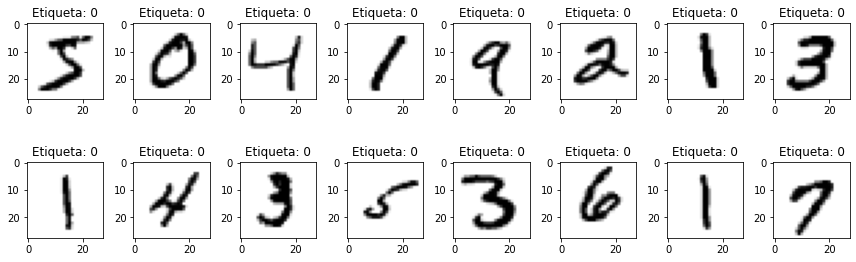

In [4]:
# Mostrar Imágenes
def print_images():
  imgs = X_train[0:MATRIX_SIZE]
  etiqs = Y_train[0:MATRIX_SIZE]
  fig, axis = plt.subplots(filas, columnas, figsize=(1.5 * columnas, 2 * filas))
  for i in range(MATRIX_SIZE):
    print = axis[i//columnas, i%columnas]
    print.imshow(imgs[i].reshape(28,28), cmap='gray_r')
    print.set_title('Etiqueta: {}'.format(np.argmax(etiqs[i])))
  plt.tight_layout()
  plt.show()

print_images()

In [5]:
# Reshape del X_train y x_test correcta (1, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Configuración de Y_train y y_test como matrices
Y_train = to_categorical(Y_train)
y_test = to_categorical(y_test)

In [6]:
# Normalización de los datos para obtener mejores resultados
X_train = X_train.astype('float32') / PIXEL_SIZE
x_test = x_test.astype('float32') / PIXEL_SIZE

## Definición del Modelo de Deep Learning CNN(Convolutional Neural Network)

Esta es una pequeña arquitectura del modelo CNN aplicado a este proyecto.

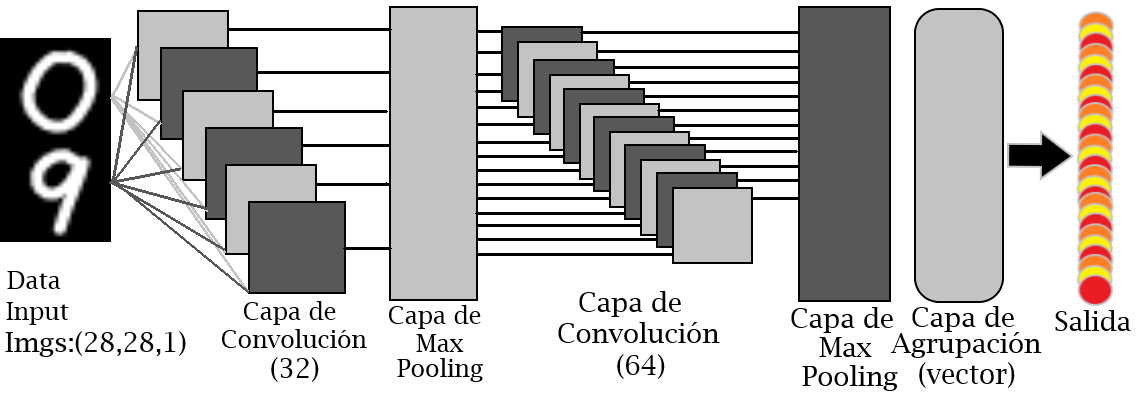

In [7]:
# Definición del Modelo
modelo = tf.keras.Sequential([
                              # Capa de Convolución de 32 filtros
                              tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
                              # Capa de agrupación máxima
                              tf.keras.layers.MaxPool2D(2,2),
                              # Capa de Convolución de 64 filtros porque aumentará el tamaño de filtros
                              tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                              # Capa de agrupación máxima
                              tf.keras.layers.MaxPool2D(2,2),
                              # Capa para vectorizar todo dentro de un vector simple
                              tf.keras.layers.Flatten(),
                              # Capa densa oculta para agrupación
                              tf.keras.layers.Dense(100, activation='relu'),
                              # Capa densa de salida(0-9) para mostrar el resultado
                              tf.keras.layers.Dense(10, activation='relu')
])
modelo

In [8]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
datagen =ImageDataGenerator()
datagen.fit(X_train)
data_gen_entrenamiento = datagen.flow(X_train, Y_train, batch_size=32)

In [10]:
# Entrenamiento del Modelo
print("ENTRENANDO EL MODELO...")
training = modelo.fit(
    data_gen_entrenamiento,
    epochs = NUM_EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data=(x_test, y_test),
    steps_per_epoch=int(np.ceil(TRAIN_SIZE / float(BATCH_SIZE))),
    validation_steps=int(np.ceil(TEST_SIZE / float(BATCH_SIZE)))
)
print("MODELO ENTRENADO CON ÉXITO!")

ENTRENANDO EL MODELO...
Epoch 1/24
1875/1875 [==============================] - 16s 7ms/step - loss: nan - accuracy: 0.1438 - val_loss: nan - val_accuracy: 0.1329
Epoch 2/24
1875/1875 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.1310 - val_loss: nan - val_accuracy: 0.1329
Epoch 3/24
1875/1875 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.1310 - val_loss: nan - val_accuracy: 0.1329
Epoch 4/24
1875/1875 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.1310 - val_loss: nan - val_accuracy: 0.1329
Epoch 5/24
1875/1875 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.1310 - val_loss: nan - val_accuracy: 0.1329
Epoch 6/24
1875/1875 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.1310 - val_loss: nan - val_accuracy: 0.1329
Epoch 7/24
1875/1875 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.1310 - val_loss: nan - val_accuracy: 0.1329
Epo

In [11]:
modelo.save('cnn_model_24_epoch.h5')

In [12]:
!pip install tensorflowjs

In [13]:
!mkdir resultados

In [14]:
!tensorflowjs_converter --input_format keras cnn_model_24_epoch.h5 resultados

In [15]:
!ls -ls

total 2204
   4 -rw-r--r-- 1 root root     617 Dec  7 20:23 0.png
   4 -rw-r--r-- 1 root root     626 Dec  7 20:23 1.png
   4 -rw-r--r-- 1 root root     672 Dec  7 20:23 2.png
   4 -rw-r--r-- 1 root root     595 Dec  7 20:23 3.png
   4 -rw-r--r-- 1 root root     566 Dec  7 20:23 4.png
   4 -rw-r--r-- 1 root root     673 Dec  7 20:23 5.png
   4 -rw-r--r-- 1 root root     841 Dec  7 20:23 6.png
   4 -rw-r--r-- 1 root root     454 Dec  7 20:23 7.png
   4 -rw-r--r-- 1 root root     798 Dec  7 20:23 8.png
   4 -rw-r--r-- 1 root root     723 Dec  7 20:23 9.png
2156 -rw-r--r-- 1 root root 2205040 Dec  7 21:02 cnn_model_24_epoch.h5
   4 drwxr-xr-x 2 root root    4096 Dec  7 21:02 resultados
   4 drwxr-xr-x 1 root root    4096 Dec  3 14:33 sample_data


In [16]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import cv2

def prediccion(file):
  #image = load_img(file, target_size=(28,28))
  image =  img_to_array(file)
  image = np.expand_dims(image,axis=0)
  array = modelo.predict(image)
  result = array[0]
  option = np.argmax(result)
  print("Esa imagen es el numero: ", option)
  return option

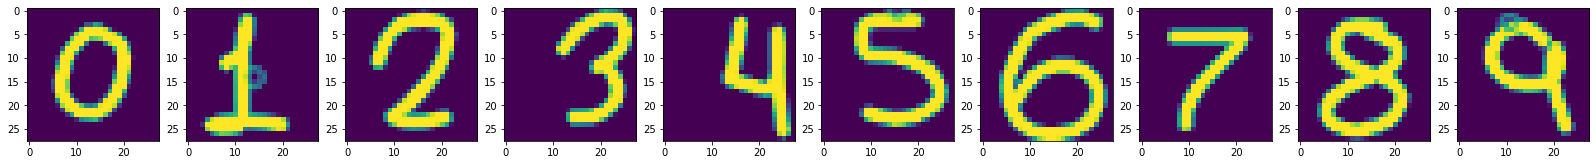

In [17]:
fig = plt.figure(figsize=(28, 28))
columns = 10
rows = 1
my_imgs=["0.png","1.png","2.png","3.png","4.png","5.png","6.png","7.png","8.png","9.png"]
for i in range(1, columns*rows +1):
    img = cv2.imread(my_imgs[i-1], cv2.IMREAD_GRAYSCALE)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [20]:
rate = 0
for i in range(9):
  print("Imagen: ", i+1)
  ruta = str(i+1) + ".png"
  image = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
  pred = prediccion(image)
  if(i == pred):
    rate = rate + 1
  print(pred)
print("El porcentaje el modelo con las imagenes de prueba es del", rate*10,"%")

Imagen:  1
Esa imagen es el numero:  0
0
Imagen:  2
Esa imagen es el numero:  0
0
Imagen:  3
Esa imagen es el numero:  0
0
Imagen:  4
Esa imagen es el numero:  0
0
Imagen:  5
Esa imagen es el numero:  0
0
Imagen:  6
Esa imagen es el numero:  0
0
Imagen:  7
Esa imagen es el numero:  0
0
Imagen:  8
Esa imagen es el numero:  0
0
Imagen:  9
Esa imagen es el numero:  4
4
El porcentaje el modelo con las imagenes de prueba es del 10 %
